# **Herramientas de Análisis**

<br>

# Preparación del entorno

Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/init_python_b1.git /content/init_python_b1
    !git -C /content/init_python_b1 pull
    %cd /content/init_python_b1

# Ejercicio 2

Para el ejercicio 2, añadimos los datos del ejercicio 1 los datos de planetas.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # para el estilo de graficos

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}

# Datos people
people_df = entidades_df['people'][["height","mass","birth_year","gender","homeworld"]].dropna()

# planetas
planets_df = entidades_df['planets'][["orbital_period","url"]].dropna()
planets_df.head()

,orbital_period,url
name,,
Tatooine,304.0,http://swapi.dev/api/planets/1/
Alderaan,364.0,http://swapi.dev/api/planets/2/
Yavin IV,4818.0,http://swapi.dev/api/planets/3/
Hoth,549.0,http://swapi.dev/api/planets/4/
Dagobah,341.0,http://swapi.dev/api/planets/5/


## Ejercicio 2.1.

Construye una función que diga "buenos días", "buenas tardes" o "buenas noches" en función de la hora del día.

> Truco 1: Para testear la función haz que tenga un parametro de entrada que tenga como valor por defecto: `datetime.now()` (primero carga `from datetime import datetime`).

> Truco 2: Puedes extraer la hora de un datetime con `.hour`.

In [3]:
from datetime import datetime
 
def saludar(x=datetime.now()):
  """Saludo en función de la hora del día."""
  
  hora = x.hour
  if hora>=6 and hora<13:
    saludo = 'Buenos días'
  elif hora>=13 and hora<20:
    saludo = 'Buenas tardes'
  else: 
    saludo = 'Buenas noches'
  print(saludo)

saludar()


Buenos días


## Ejercicio 2.2.

En el data frame personajes_df, calcula de nuevo el IMC y crea una nueva variable con el trameado de la variable IMC definido en la siguiente tabla:

 | Categoría de nivel de peso | Intervalo del percentil |
 | -------------------------- | ----------------------- | 
 | Bajo peso | < 18.5 |
 | Normal | >= 18.5 y < 25 |
 | Sobrepeso | >= 25 y <30 |
 | Obeso | >= 30 |

> Truco: utiliza `pd.cut(..., right=False)` y modifica las etiquetas con `.cat.categories`.  

In [4]:
people_df["IMC"] = people_df.mass / (people_df.height/100)**2
people_df.head()


,height,mass,birth_year,gender,homeworld,IMC
name,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778


In [5]:
people_df["IMC_TED"] = pd.cut(people_df.IMC, [0,18.5,25,30,np.inf])
people_df.head()


,height,mass,birth_year,gender,homeworld,IMC,IMC_TED
name,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,"(25.0, 30.0]"
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,"(25.0, 30.0]"
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,"(30.0, inf]"
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,"(30.0, inf]"
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,"(18.5, 25.0]"


In [6]:
people_df["IMC_TED"].cat.categories=["Bajo peso","Normal", "Sobrepeso","Obeso"]
people_df.head()


,height,mass,birth_year,gender,homeworld,IMC,IMC_TED
name,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,Obeso
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,Normal


## Ejercicio 2.3.

Muestra las frecuencias de la nueva variable definida en 2.2.

In [7]:
people_df.IMC_TED.value_counts().sort_index()


Bajo peso     4
Normal       14
Sobrepeso    11
Obeso         7
Name: IMC_TED, dtype: int64

## Ejercicio 2.4.

Calcula ahora un trameado de la edad en 5 grupos equiprobables.

Muestra los recuentos (frecuencias) de la nueva obtenida por pantalla.

> Truco: Busca ayuda de la función [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)

In [8]:
people_df["Age_TEP"] = pd.qcut(people_df.birth_year,5, duplicates="drop")
people_df.head()


,height,mass,birth_year,gender,homeworld,IMC,IMC_TED,Age_TEP
name,,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso,"(7.999, 29.0]"
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso,"(82.0, 896.0]"
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,Obeso,"(29.0, 41.9]"
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso,"(29.0, 41.9]"
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,Normal,"(7.999, 29.0]"


In [9]:
people_df["Age_TEP"].cat.categories=["<29",">=29 y <41.9", ">=41.9 y < 52",">=52 y <82",">=82"]
people_df.head()


,height,mass,birth_year,gender,homeworld,IMC,IMC_TED,Age_TEP
name,,,,,,,,
Luke Skywalker,172.0,77.0,19.0,male,http://swapi.dev/api/planets/1/,26.027582,Sobrepeso,<29
C-3PO,167.0,75.0,112.0,none,http://swapi.dev/api/planets/1/,26.892323,Sobrepeso,>=82
R2-D2,96.0,32.0,33.0,none,http://swapi.dev/api/planets/8/,34.722222,Obeso,>=29 y <41.9
Darth Vader,202.0,136.0,41.9,male,http://swapi.dev/api/planets/1/,33.330066,Obeso,>=29 y <41.9
Leia Organa,150.0,49.0,19.0,female,http://swapi.dev/api/planets/2/,21.777778,Normal,<29


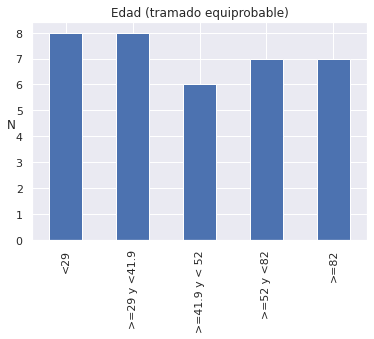

In [10]:
ax = people_df.Age_TEP.value_counts().sort_index().plot.bar(title = "Edad (tramado equiprobable)")
ax.set_ylabel("N",rotation=0);

## Ejercicio 2.5.

Presenta la tabla cruzada de tramos de edad (ej. 2.4) por tramos de IMC (ej. 2.2). 

¿Qué tramo de edad tiene un mayor número de personajes con Bajo peso?

In [11]:
Resumen25 = pd.crosstab(people_df["Age_TEP"],people_df["IMC_TED"])

Resumen25

IMC_TED,Bajo peso,Normal,Sobrepeso,Obeso
Age_TEP,,,,
<29,0,3,4,1
>=29 y <41.9,1,2,3,2
>=41.9 y < 52,3,1,1,1
>=52 y <82,0,4,2,1
>=82,0,4,1,2


In [12]:
Resumen25bis = Resumen25[Resumen25["Bajo peso"]==Resumen25["Bajo peso"].max()]

Resumen25bis.index[0]

'>=41.9 y < 52'

## Ejercicio 2.6.

Calcula una tabla resumen (data frame) donde se presente la media del IMC en cada tramo de edad calculado en ejercicio 2.4.

Presenta por pantalla la nueva tabla resumen.


In [13]:
Resumen26 = people_df.groupby(["Age_TEP"])[["IMC"]].mean()

Resumen26

,IMC
Age_TEP,
<29,25.960538
>=29 y <41.9,26.242997
>=41.9 y < 52,22.972490
>=52 y <82,24.774935
>=82,85.311313


## Ejercicio 2.7.

Presenta los datos del ej. 2.6. como un gráfico de líneas donde el eje x sea la edad y el eje y el IMC medio.

> Truco: Como eje x del gráfico de líneas, puedes calcular en 2.6., en el mismo cálculo del IMC medio, la mediana de edad de cada tramo de edad.

In [14]:
Resumen27 = people_df.groupby(["Age_TEP"]).agg({'IMC':'mean','birth_year':'median'})

Resumen27.head()


,IMC,birth_year
Age_TEP,,
<29,25.960538,20.0
>=29 y <41.9,26.242997,38.5
>=41.9 y < 52,22.972490,47.5
>=52 y <82,24.774935,58.0
>=82,85.311313,112.0


Text(0, 0.5, 'IMC medio')

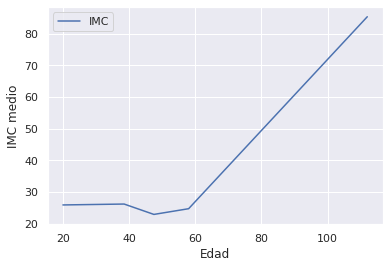

In [15]:
ax = Resumen27.plot.line(x="birth_year",y="IMC")
ax.set_xlabel("Edad")
ax.set_ylabel("IMC medio")


## Ejercicio 2.8.

Calcula el ratio del IMC sobre la mediana del IMC de su tramo de edad (definidos en el ejercicio 2.2.) mediante la función groupby(...).apply(...).

> truco: primero crea una función que devuelva:  `x / np.nanmedian(x)`.

Presenta los datos mediante un boxplot de la nueva variable: [pd.boxplot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html). 

In [16]:
def div_mediana(x):
    return x / np.nanmedian(x)

people_df["RATIO_IMC_MEDIANA_IMC_EDAD"] = people_df.groupby(["Age_TEP"]).IMC.apply(div_mediana)

people_df.describe()


,height,mass,birth_year,IMC,RATIO_IMC_MEDIANA_IMC_EDAD
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,173.638889,112.233333,91.091667,36.835193,1.535005
std,30.941560,215.205026,169.124347,69.924613,2.928102
min,66.000000,17.000000,8.000000,13.148283,0.624857
25%,170.000000,72.000000,31.375000,22.420452,0.901011
50%,179.000000,79.000000,46.500000,24.904023,1.000000
75%,188.000000,84.000000,67.500000,26.705780,1.137899
max,228.000000,1358.000000,896.000000,443.428571,18.558731


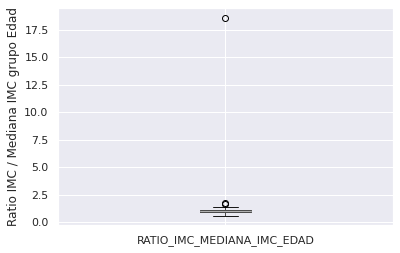

In [17]:
ax = people_df.boxplot("RATIO_IMC_MEDIANA_IMC_EDAD")
ax.set_ylabel("Ratio IMC / Mediana IMC grupo Edad");

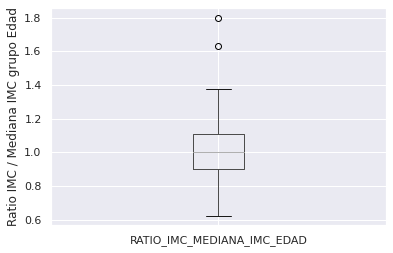

In [18]:
ax = people_df[people_df.RATIO_IMC_MEDIANA_IMC_EDAD<15].boxplot("RATIO_IMC_MEDIANA_IMC_EDAD")
ax.set_ylabel("Ratio IMC / Mediana IMC grupo Edad");

## Ejercicio 2.9.

¿Cual es planeta con un menor índice IMC medio de sus personajes?
¿Que personaje/s son de ese planeta?

In [19]:
people_planets_df = pd.merge(people_df.reset_index(),
                                 planets_df[["url"]].reset_index(),
                                 how="left",
                                 left_on=["homeworld"],
                                 right_on=["url"]).drop(["homeworld", "url"],
                                                        axis=1).rename(columns={"name_x": "personaje","name_y": "planeta"})
people_planets_df.head()

,personaje,height,mass,birth_year,gender,IMC,IMC_TED,Age_TEP,RATIO_IMC_MEDIANA_IMC_EDAD,planeta
0,Luke Skywalker,172.0,77.0,19.0,male,26.027582,Sobrepeso,<29,1.022508,Tatooine
1,C-3PO,167.0,75.0,112.0,none,26.892323,Sobrepeso,>=82,1.125519,Tatooine
2,R2-D2,96.0,32.0,33.0,none,34.722222,Obeso,>=29 y <41.9,1.366115,Naboo
3,Darth Vader,202.0,136.0,41.9,male,33.330066,Obeso,>=29 y <41.9,1.311342,Tatooine
4,Leia Organa,150.0,49.0,19.0,female,21.777778,Normal,<29,0.855552,Alderaan


In [20]:
# Ahora calculamos el IMC medio por planeta, ordenamos de menor a mayor
# y seleccionamos el primero
Resumen29 = people_planets_df.groupby("planeta")["IMC"].mean().sort_values().head(1)
print(f"Planeta con menor IMC medio: '{Resumen29.index[0]}', con IMC medio igual a {Resumen29[0]}.")

# Buscamos los personajes de este planeta
print(f"\nPersonaje(s) del planeta {Resumen29.index[0]}:")
people_planets_df[people_planets_df.planeta == Resumen29.index[0]]["personaje"]

Planeta con menor IMC medio: 'Ryloth', con IMC medio igual a 17.35891932836763.

Personaje(s) del planeta Ryloth:


28    Ayla Secura
Name: personaje, dtype: object

## Ejercicio 2.10.

Convierte a datetime los siguientes strings con la función [datetime.strptime()](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior) (consulta la ayuda si es necesario) de la libreria datetime:

- "1 january, 2020"
- "15-feb.-2017"
- "20190701 22:30"  # 1 de julio de 2019



In [21]:
import datetime
dtDate1 = datetime.datetime.strptime("01 january, 2020", "%d %B, %Y")
dtDate2 = datetime.datetime.strptime("15-feb.-2017", "%d-%b.-%Y")
dtDate3 = datetime.datetime.strptime("20190701 22:30", "%Y%m%d %H:%M")
print(dtDate1)
print(dtDate2)
print(dtDate3)

2020-01-01 00:00:00
2017-02-15 00:00:00
2019-07-01 22:30:00
